### Predict Diabetes from Medical Records::
#### Dataset (Pima Indians Database): (https://www.kaggle.com/uciml/pima-indians-diabetes-database)
 - Features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age
 - Outcome: Normal(0) vs Diabetes(1)
 
### Simple Neural Network

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking Missing/Null Values for different Features

In [3]:
df1 = df.iloc[:, :-1]
print("\nColumn Name           % of Null Values\n")
# print((df1[:] == 0).sum())
((df1[:] == 0).sum())/768*100


Column Name           % of Null Values



Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

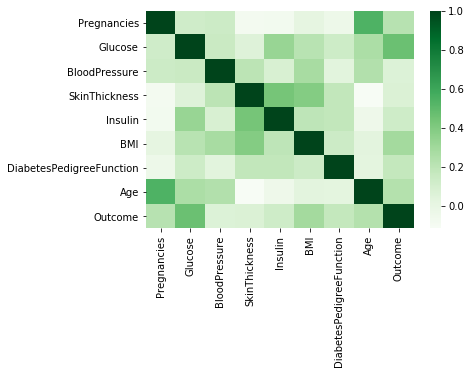

In [4]:
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="Greens", annot = False)

#### From the correlation plot, it is clear that Features with null values (Insulin and SkinThickness) are not correlated with the outcome.
### Prepare Dataset for Training and Testing

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_trainold, X_testold, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
print("X_shape:",X.shape,"Y_shape:",y.shape)
print("X_Train:",X_trainold.shape,"X_Test:", X_testold.shape)

X_shape: (768, 8) Y_shape: (768,)
X_Train: (614, 8) X_Test: (154, 8)


### Missing Values are replaced by Median

In [7]:
imputer = Imputer(missing_values=0,strategy='median')
X_train = imputer.fit_transform(X_trainold)
X_test = imputer.transform(X_testold)

In [8]:
print("X_Train:",X_train.shape,"X_Test:", X_test.shape)

X_Train: (614, 8) X_Test: (154, 8)


In [9]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
print("Mean: ",mean)
print("Std: ",std)

Mean:  [  4.43973941 121.82899023  72.26221498  28.84201954 141.33224756
  32.19723127   0.46379479  33.2980456 ]
Std:  [ 2.99817272 30.47429215 12.40618104  8.5871349  87.34394387  6.81501567
  0.327095   11.80062782]


### Preparing the data
#### To deal with different scale for different features, need to do feature-wise normalization: For each feature substract the feature-mean and divide by the feature-standard_deviation. So that the feature is centered around 0 and has a unit standard deviation.

In [10]:
X_train -= mean
X_train /= std

X_test -= mean # For test data also use same mean and std, because never use test data 
X_test /= std   

In [11]:
X_train.mean(axis=0)

array([7.81134115e-17, 9.40254027e-17, 4.77359737e-16, 1.44654466e-16,
       1.15723573e-17, 6.84938895e-16, 1.51887189e-16, 2.19874788e-16])

In [12]:
X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

### Build the Network Model

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(8,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])

In [15]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [16]:
x_val = X_train[:150]
partial_x_train = X_train[150:]
y_val = y_train[:150]
partial_y_train = y_train[150:]

In [17]:
print("x_val:",x_val.shape, "y_val:",y_val.shape)

x_val: (150, 8) y_val: (150,)


In [18]:
print("x_train:",partial_x_train.shape,"y_train:",partial_y_train.shape)

x_train: (464, 8) y_train: (464,)


In [19]:
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=10, 
                    batch_size=32, validation_data=(x_val, y_val))

Train on 464 samples, validate on 150 samples
Epoch 1/10
464/464 [==============================] - 1s 1ms/step - loss: 0.5832 - acc: 0.6789 - val_loss: 0.5618 - val_acc: 0.7400
Epoch 2/10
464/464 [==============================] - 0s 210us/step - loss: 0.4958 - acc: 0.7586 - val_loss: 0.5284 - val_acc: 0.7533
Epoch 3/10
464/464 [==============================] - 0s 219us/step - loss: 0.4754 - acc: 0.7759 - val_loss: 0.5107 - val_acc: 0.7400
Epoch 4/10
464/464 [==============================] - 0s 216us/step - loss: 0.4716 - acc: 0.7672 - val_loss: 0.5053 - val_acc: 0.7600
Epoch 5/10
464/464 [==============================] - 0s 387us/step - loss: 0.4692 - acc: 0.7759 - val_loss: 0.5071 - val_acc: 0.7467
Epoch 6/10
464/464 [==============================] - 0s 217us/step - loss: 0.4638 - acc: 0.7888 - val_loss: 0.5147 - val_acc: 0.7467
Epoch 7/10
464/464 [==============================] - 0s 219us/step - loss: 0.4659 - acc: 0.7651 - val_loss: 0.5035 - val_acc: 0.7400
Epoch 8/10
464/464

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Plotting Training and Validation Loss

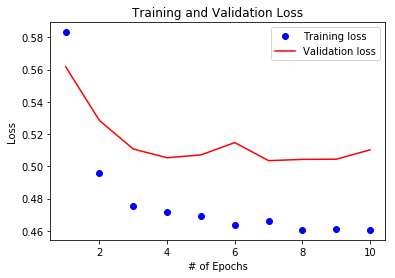

In [21]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss') # bo = blue dot
plt.plot(epochs, val_loss_values, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting Training and Validation Accuracy

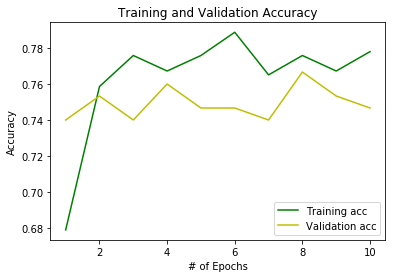

In [22]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'g', label = 'Training acc') # bo = blue dot
plt.plot(epochs, val_acc_values, 'y', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
results = model.evaluate(X_test, y_test)

154/154 [==============================] - 0s 210us/step


In [24]:
print("Test Accuracy:",results[1])

Test Accuracy: 0.7662337685560251
